In [127]:
import pandas as pd

In [128]:
df = pd.read_csv('train_data.csv')
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17-01-2011,8091,216418,99.0375,111.8625,0,0,20
1,2,17-01-2011,8091,216419,99.0375,99.0375,0,0,28
2,3,17-01-2011,8091,216425,133.9500,133.9500,0,0,19
3,4,17-01-2011,8091,216233,133.9500,133.9500,0,0,44
4,5,17-01-2011,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09-07-2013,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09-07-2013,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09-07-2013,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09-07-2013,9984,547934,141.7875,191.6625,0,1,12


In [129]:
df[['day', 'month', 'year']] = df['week'].str.split('-', expand=True)
df = df.drop('week', axis=1)

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [132]:
model.score(X_test, y_test)

0.7753475107190532

In [133]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

27.149827988838343

In [134]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

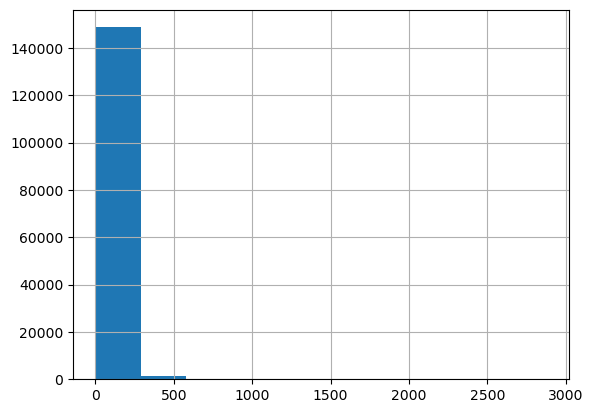

In [135]:
df.units_sold.hist()

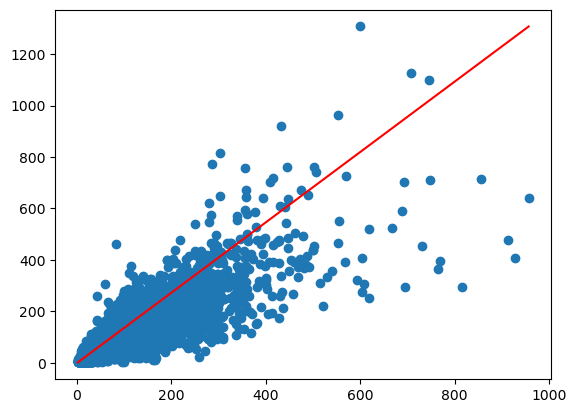

In [136]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

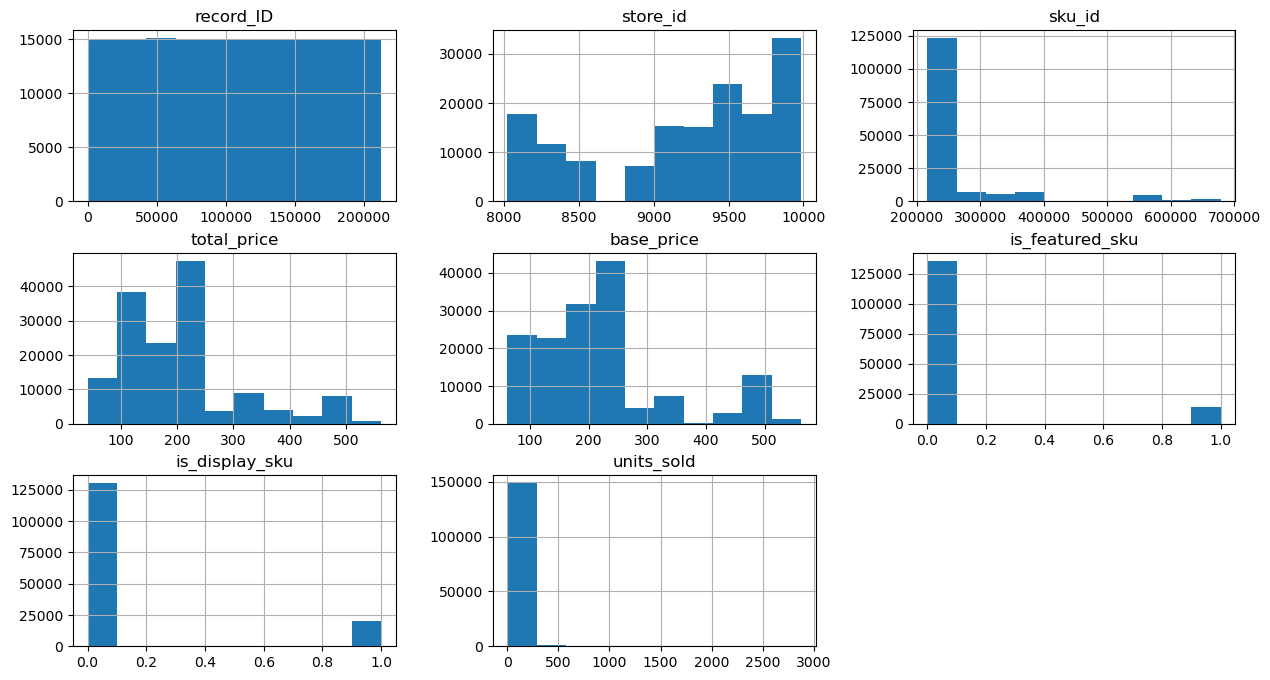

In [137]:
df.hist(figsize=(15, 8))
plt.show()

In [138]:
df = df.drop('record_ID', axis=1)
len(df.store_id.unique())

76

In [139]:
len(df.sku_id.unique())

28

<Axes: >

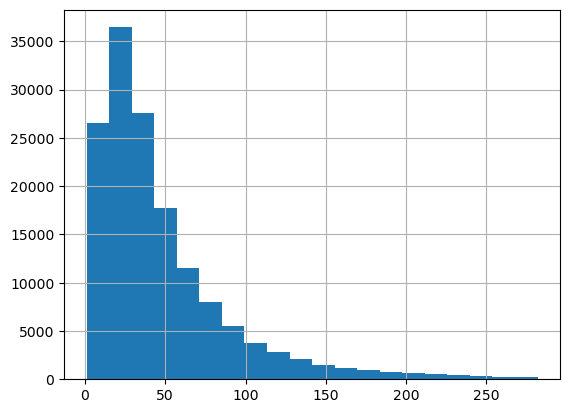

In [140]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]
df.units_sold.hist(bins=20)

In [141]:
df = df.join(pd.get_dummies(df.store_id, prefix='store'))
df = df.join(pd.get_dummies(df.sku_id, prefix='item'))
df = df.drop(['store_id', 'sku_id'], axis=1)

In [142]:
model = RandomForestRegressor(n_jobs=-1)

X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [144]:
model.score(X_test, y_test)

0.8261971846245915

In [145]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.795779053166587

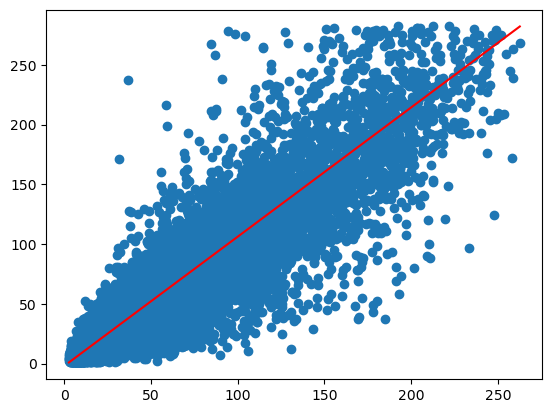

In [146]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

In [150]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2, 3]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  13.6s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  13.8s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  13.4s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  26.0s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  25.6s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  25.4s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.2s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  23.9s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  23.9s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [151]:
best_model = grid_search.best_estimator_

In [152]:
grid_search.best_params_


{'min_samples_split': 3, 'n_estimators': 20}

In [153]:
best_model.score(X_test, y_test)


0.8188480133424979